In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Series
# Series 是 Pandas 中最基本的一维数组形式。其可以储存整数、浮点数、
# 字符串等类型的数据。Series 基本结构如下：
# pandas.Series(data=None, index=None)
# data 可以是字典，或者NumPy 里的 ndarray 对象等。index 是数据索引，
# 索引是 Pandas 数据结构中的一大特性，它主要的功能是帮助我们更快速地定位数据

s = pd.Series({'a':10,'b':20,'c':30})
print(s,'\n',type(s))

s = pd.Series(np.random.randn(5))
s

a    10
b    20
c    30
dtype: int64 
 <class 'pandas.core.series.Series'>


0    0.567393
1   -0.977261
2    0.450823
3    0.136563
4    1.234730
dtype: float64

In [2]:
# DataFrame
# DataFrame 是 Pandas 中最为常见、最重要且使用频率最高的数据结构。
# DataFrame 和平常的电子表格或 SQL 表结构相似。
# 你可以把 DataFrame 看成是 Series 的扩展类型，
# 它仿佛是由多个 Series 拼合而成。
# 它和 Series 的直观区别在于，数据不但具有行索引，且具有列索引。

# pandas.DataFrame(data=None, index=None, columns=None)
# 区别于 Series，其增加了 columns 列索引。DataFrame 可以由以下多个类型的数据构建：
# • 一维数组、列表、字典或者 Series 字典。
# • 二维或者结构化的 numpy.ndarray。
# • 一个 Series 或者另一个 DataFrame。

df = pd.DataFrame({'one':pd.Series([1,2,3]),
                   'two':pd.Series([4,5,6])})
df = pd.DataFrame(np.random.randint(5,size=(5,5)))
df

,0,1,2,3,4
0,0,4,3,3,3
1,2,1,1,3,1
2,1,2,1,2,0
3,2,0,4,1,2
4,0,3,2,4,1


In [12]:
# 数据读取
# pd.read_csv等

NameError: name '等' is not defined

In [15]:
# 基本操作
# 默认显示前 5 条
df.head()
# 指定显示后 7 条
df.tail(3)
# describe() 相当于对数据集进行概览，会输出该数据集每一列数据的计数、最大值、最小值等。
df.describe()
# Pandas 基于 NumPy 开发，所以任何时候你都可以通过 .values 将 DataFrame 转换为 NumPy 数组。
df.values
# 查看索引
df.index 
# 查看列名
df.columns 
# 查看形状
df.shape 

,0,1,2,3,4
2,0,1,2,0,1
3,3,2,4,4,1
4,1,3,3,1,2


In [36]:
# 数据选择
# 基于索引数字选择
# 我们可以选择前 3 行数据
# print(df.iloc[:])
# print(df[:3])

# 选择特定的一行
# 特定行需要使用.iloc,否则输出的为特定列的值
# print(df.iloc[4])
# print(df[4])

# 输出特定多行
# print(df.iloc[[1,3,4]])

# 输出列
# print(df.iloc[:,1:4])

# 基于标签名称选择
# df.loc[]
# 1. 单个标签。例如：2 或 'a'，这里的 2 指的是标签而不是索引位置。
# 2. 列表或数组包含的标签。例如：['A', 'B', 'C']。
# 3. 切片对象。例如：'A':'E'，注意这里和上面切片的不同支持，首尾都包含在内。
# 4. 布尔数组。
# 5. 可返回标签的函数或参数。
df = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D'])
print(df.loc[0:2])
print(df.loc[[0,1,3]])
print(df.loc[:,['A','C']])
print(df.loc[:,'A':'C'])

   A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
     A    B    C    D
0  0.0  1.0  2.0  3.0
1  4.0  5.0  6.0  7.0
3  NaN  NaN  NaN  NaN
   A   C
0  0   2
1  4   6
2  8  10
   A  B   C
0  0  1   2
1  4  5   6
2  8  9  10


C:\Users\bolat\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [48]:
# 数据删减
# DataFrame.drop
# df.drop(labels=['A','C'],axis=1)
# df.drop(columns=['A','D'])
# df.drop(index=[0,1])

# 去重
# df.drop_duplicates()

# 删除缺省值
df.dropna()

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


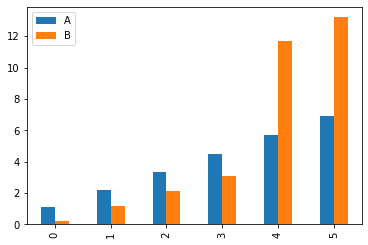

In [72]:
# 数据填充
# 检测缺失值
# DataFlame.isna()
# DataFlame.notna()
df = pd.DataFrame(np.random.rand(9, 5), columns=list('ABCDE'))
df.insert(value=pd.Timestamp('2019/8/28'),loc=0,column='Time')
df.iloc[[1,3,5,7],[0,2,4]] = np.nan
df.iloc[[2,4,6,8],[1,3,5]] = np.nan
df
# df.isna()
# df.notna()

# 填充缺失值
# df.fillna(0)
# 使用缺失值前面的值进行填充
# df.fillna(method='pad')
# 使用缺失值后面的值进行填充
# df.fillna(method='bfill')

# 可以看到，连续缺失值也是按照前序数值进行填充的，
# 并且完全填充。这里，我们可以通过 limit= \
# 参数设置连续填充的限制数
# 最多填充一项
# df.fillna(method='pad', limit=1)

# 对 C 列和 E 列用平均值填充
df.fillna(df.mean()['C':'E'])

# 插值填充
# 插值是数值分析中一种方法。简而言之，
# 就是借助于一个函数（线性或非线性），
# 再根据已知数据去求解未知数据的值。
# 插值在数据领域非常常见，它的好处在于，
# 可以尽量去还原数据本身的样子。

# 对于 interpolate() 支持的插值算法，也就是 method=。下面给出几条选择的建议：
# 1. 如果你的数据增长速率越来越快，可以选择 method='quadratic'二次插值。
# 2. 如果数据集呈现出累计分布的样子，推荐选择 method='pchip'。
# 3. 如果需要填补缺省值，以平滑绘图为目标，推荐选择 method='akima'。
# 当然，最后提到的 method='akima'，需要你的环境中安装了 Scipy 库。
# 除此之外，method='barycentric' 和 method='pchip' 
# 同样也需要 Scipy 才能使用。
df = pd.DataFrame({'A':[1.1,2.2,np.nan,4.5,5.7,6.9],
                   'B':[.21,np.nan,np.nan,3.1,11.7,13.2]})
df_interpolated = df.interpolate()
df_interpolated.plot(kind='bar')

In [73]:
# 数据可视化

In [74]:
# 数据计算


In [76]:
# 统计分析


In [77]:
# 时间序列


NameError: name '时间序列' is not defined